In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import pandas as pd
from collections import Counter
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap

In [58]:
def visualize_kmeans(vectors, k = 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(vectors)
    
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
    colors = ['blue', 'green', 'red', 'black', 'yellow', 'purple', 'pink', 'brown']

    if k <= 8:
        scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap=ListedColormap(colors[:k]), c=kmeans_labels, s=10)
        plt.colorbar(scatter, ticks=list(range(k)), label='Cluster')
    else:
        scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, s=10)
    
    plt.title('K-means Clusters')
    plt.show()

    silhouette_avg = silhouette_score(vectors, kmeans_labels)
    print(f'K={k}, Average Silhoutte score: {silhouette_avg}\n')

    c = Counter(kmeans_labels)
    print(f'Cluster distribution:\n {sorted(c.items())}')
    
    return kmeans_labels

In [59]:
vector_dict = {}
for i in range(0, 1000, 100):
    partial_vector_dict = pd.read_pickle(f"importances/importances/importance_{i+99}.pkl")
    vector_dict.update(partial_vector_dict)

vector_dict_l1 = {k:v[0].numpy() for k,v in vector_dict.items()}

In [53]:
vector_dict
vectors = np.array(list(vector_dict_l1.values()))

### Run with different K values

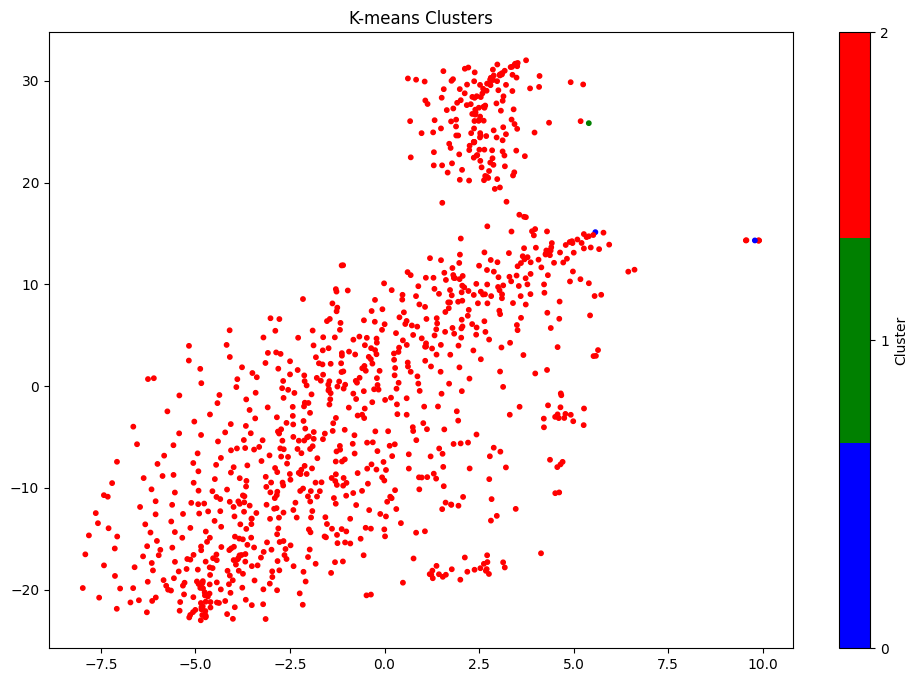

K=3, Average Silhoutte score: 0.9203584877074263

Cluster distribution:
 [(0, 2), (1, 1), (2, 997)]


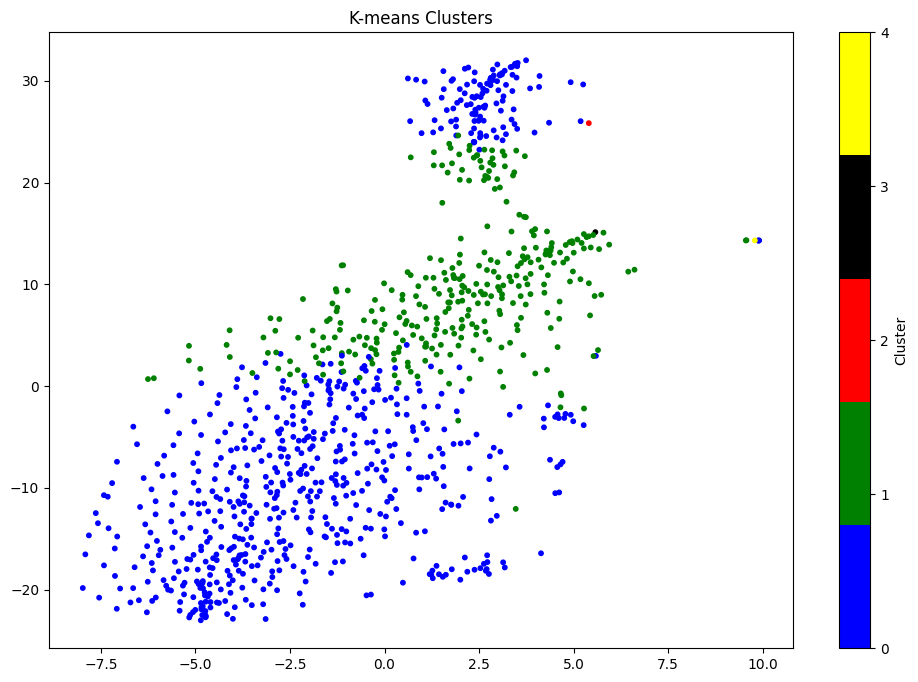

K=5, Average Silhoutte score: 0.24322160233988177

Cluster distribution:
 [(0, 676), (1, 321), (2, 1), (3, 1), (4, 1)]


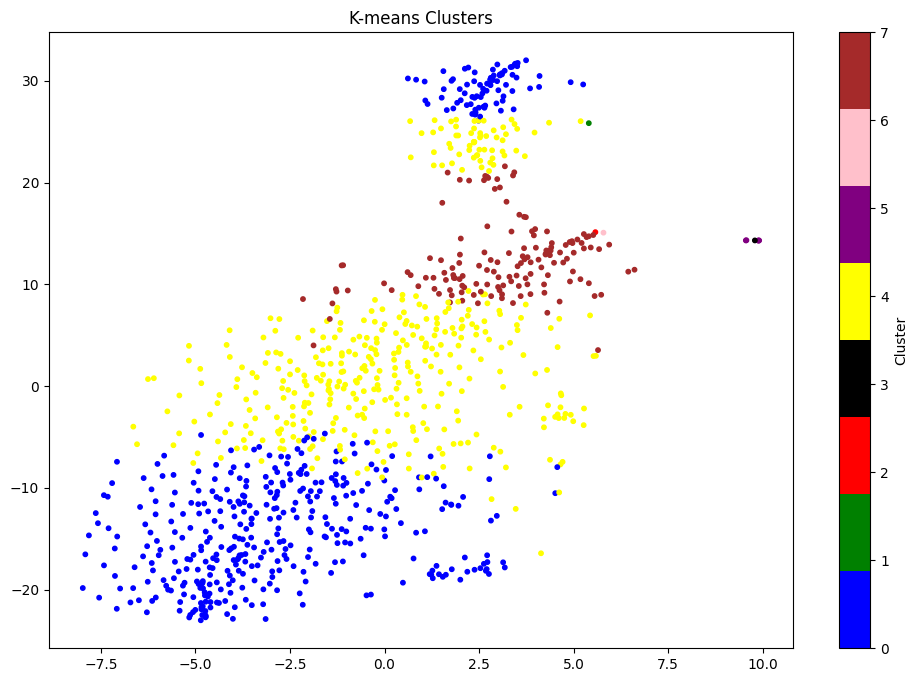

K=8, Average Silhoutte score: 0.12894625317465147

Cluster distribution:
 [(0, 456), (1, 1), (2, 1), (3, 1), (4, 393), (5, 5), (6, 1), (7, 142)]


In [60]:
for k in [3,5,8]:
    visualize_kmeans(vectors, k=k)